# install all packages for regression

In [ ]:
using Pkg,

Pkg.add("CSV", "DataFrames", "GLM", "Plots")

# load all packages for regression

In [1]:
using CSV, DataFrames, GLM, Plots
# , Distributions, StatsPlots, StatsBase, MLBase, StatsBase, StatsModels,Statistics, OnlineStats

# check your current work directory

In [2]:
cd("/Users/ning/Downloads")

# load dataset

In [3]:
df = CSV.read("Q2.csv", DataFrame);

# check all observations

In [4]:
df

,GPA,ACT
,Float64,Int64
1,2.8,21
2,3.4,24
3,3.0,26
4,3.5,27
5,3.6,29
6,3.0,25
7,2.7,25
8,3.7,30


# check variables in data set

In [5]:
names(df)

2-element Vector{String}:
 "GPA"
 "ACT"

# computer summary statistics

In [6]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,GPA,3.2125,2.7,3.2,3.7,,,Float64
2,ACT,25.875,21,25.5,30,,,Int64


# run OLS

## set up your regression formula

In [9]:
fm0 = @formula(GPA ~ 1 + ACT)

FormulaTerm
Response:
  GPA(unknown)
Predictors:
  1
  ACT(unknown)

# run OLS

In [10]:
OLS_model = lm(fm0, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

GPA ~ 1 + ACT

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error     t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.568132    0.928421  0.61    0.5630  -1.70363     2.8399
ACT          0.102198    0.035692  2.86    0.0287   0.0148626   0.189533
────────────────────────────────────────────────────────────────────────

# make prediction

In [17]:
pd = DataFrame(ACT = minimum(df.ACT): 0.01:maximum(df.ACT));
pr = predict(OLS_model, pd, interval = :prediction, level = 0.95);

# plot data and regression line

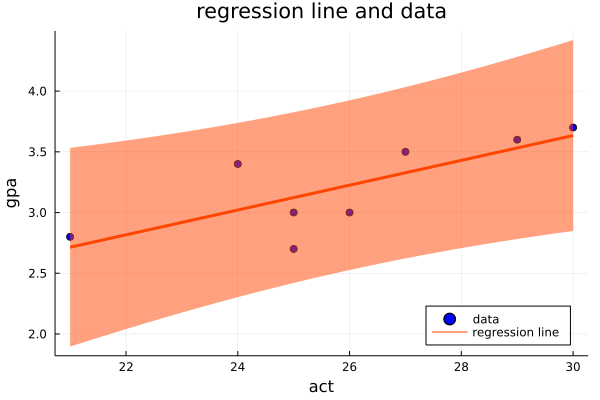

In [19]:
plot(xlabel = "act", ylabel = "gpa", legend=:bottomright, title = "regression line and data")

scatter!(df.ACT, df.GPA, c = "blue", label="data")

plot!(pd.ACT, pr.prediction, label="regression line", color="orangered", linewidth=3, ribbon = (pr.prediction .- pr.lower, pr.upper .- pr.prediction))